# 4.9.1 Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_pickle(r'C:\Users\christina.savva\Documents\CF Achievement 4 - Instacart Basket Analysis\02 Data\Prepared Data\49_output.pkl')

In [3]:
path = r'C:\Users\christina.savva\Documents\CF Achievement 4 - Instacart Basket Analysis'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                object  
 1   user_id                 object  
 2   eval_set                object  
 3   order_number            int8    
 4   orders_day_of_week      int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float64 
 7   first_order             object  
 8   product_id              int16   
 9   reordered               int8    
 10  product_name            object  
 11  aisle_id                int8    
 12  department_id           int8    
 13  prices                  float64 
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int8    
 19  loyalty_flag            object  
 20  spend_group             float64 
 21  spend_

# 4.9.2 If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

In [7]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7  #  creating a list holding True/False to the test nprandon.rant() <= 0.7

In [9]:
big = df[dev]  #  stores 70% of the sample in DF big

In [10]:
small = df[~dev]  #  stores 30% of the sample in DF small

In [11]:
len(df)  #  checking number of rows


32404859

In [12]:
len(big) + len(small)

32404859

In [13]:
df_2 = small  #  I will use the smaller sample in order to save memory

In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                object  
 1   user_id                 object  
 2   eval_set                object  
 3   order_number            int8    
 4   orders_day_of_week      int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float64 
 7   first_order             object  
 8   product_id              int16   
 9   reordered               int8    
 10  product_name            object  
 11  aisle_id                int8    
 12  department_id           int8    
 13  prices                  float64 
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int8    
 19  loyalty_flag            object  
 20  spend_group             float64 
 21  spend_f

In [15]:
df_2.value_counts('_merge')

_merge
both          9721098
left_only           0
right_only          0
dtype: int64

In [18]:
df_2 = df_2.drop (columns = ['_merge'])

In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 32404850
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                object 
 1   user_id                 object 
 2   eval_set                object 
 3   order_number            int8   
 4   orders_day_of_week      int8   
 5   order_hour_of_day       int8   
 6   days_since_prior_order  float64
 7   first_order             object 
 8   product_id              int16  
 9   reordered               int8   
 10  product_name            object 
 11  aisle_id                int8   
 12  department_id           int8   
 13  prices                  float64
 14  price_range_loc         object 
 15  busiest_day             object 
 16  busiest_days            object 
 17  busiest_period_of_day   object 
 18  max_order               int8   
 19  loyalty_flag            object 
 20  spend_group             float64
 21  spend_flag              object

# 4.9.3 You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

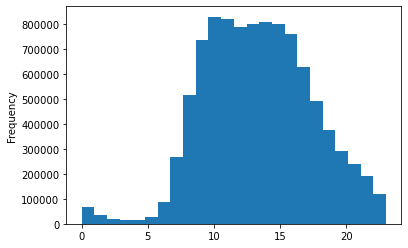

In [36]:
bar = df_2['order_hour_of_day'].plot.hist(bins = 24)  #  creating 24 bins to reflect each hour of the day

The peak hours for orders are between 9am and 4pm, which a sharp rise from 6am and slow decline in the later afternoon and evening hours.

# 4.9.4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

<AxesSubplot:>

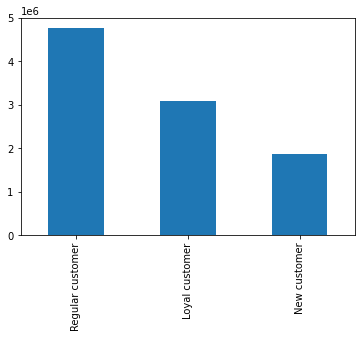

In [22]:
df_2['loyalty_flag'].value_counts().plot.bar()

The majority of customers are regular, followed by loyal customers (with over 40 orders) and the smallest group are new customers (with under 10 orders).

# 4.9.5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [25]:
df_hours_prices = df_2[['order_hour_of_day','prices']]  #  picking the two relevant columns for the chart

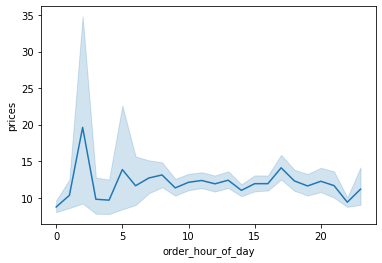

In [39]:
line_order_hour_of_day_prices = sns.lineplot(data = df_hours_prices, x = 'order_hour_of_day',y = 'prices')

Expenditure at night appears to be peak whereas during the day it is relatively flat.

# 4.9.6 Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

In [27]:
df_age_children = df_2[['age','children']]  #  picking the two relevant columns for the chart

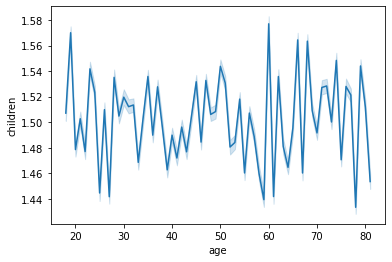

In [41]:
line_age_children = sns.lineplot(data = df_age_children, x = 'age',y = 'children')

There is no correlation between the customer ages and the number of dependents they have.

# You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

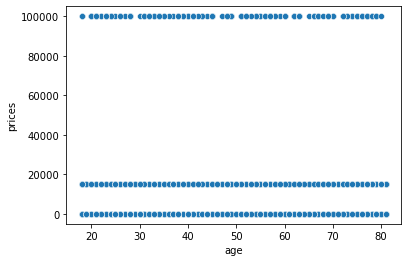

In [44]:
scatterplot = sns.scatterplot(x = 'age', y = 'prices',data = df_2)

There is no correlation between the customer ages and their spend.

# 4.9.8 Export your visualizations as “.png” files in your relevant project folder.

In [38]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_hour_of_day.png'))

In [40]:
line_order_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_of_day_prices.png'))

In [42]:
line_age_children.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_children.png'))

In [45]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_price.png'))